# **1. Perkenalan Dataset**


Menggunakan dataset **Beverage Sales** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari *Kaggle* https://www.kaggle.com/datasets/sebastianwillmann/beverage-sales
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak memiliki label atau kelas.
   - **Jumlah Baris**: Dataset diambil subset sample secara acak sebanyak 10.000 karena dataset terlalu besar.
   - **Tipe Data**:
     - *Kategorikal*: Order_ID, Customer_ID, Customer_Type, Product, Category, Region, Order_Date.
     - *Numerikal*: Unit_Price, Quantity, Discount, Total_Price.

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import numpy as np # Mengimpor library numpy untuk numerik
import pandas as pd  # Mengimpor pustaka pandas untuk manipulasi dan analisis data
import matplotlib.pyplot as plt # Mengimpor maplotlib untuk visualisasi grafik
import seaborn as sns # Mengimpor seaborn untuk visualisasi data
from yellowbrick.cluster import KElbowVisualizer  # Mengimpor KElbowVisualizer untuk visualisasi metode Elbow
from sklearn.cluster import KMeans # Mengimpor algoritma KMeans untuk clustering
from sklearn.metrics import silhouette_score  # Mengimpor silhouette_score untuk mengevaluasi hasil clustering
from sklearn.feature_selection import SelectKBest, mutual_info_classif # Mengimpor feature selection untuk meningkatkan akurasi
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler # Mengimpor encoder, standarisasi, dan normalisasi untuk preprocessing
from sklearn.decomposition import PCA # Mengimpor PCA untuk visualisasi hasil clustering

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [2]:
# impor dataset
bev_df = pd.read_csv('synthetic_beverage_sales_data.csv')

In [3]:
# ambil subset secara acak sebanyak 10.000 karena dataset terlalu besar
bev_df = bev_df.sample(n=10000, random_state=42, ignore_index=True)
bev_df.to_csv('dataset_awal.csv', index=False)

In [4]:
df = pd.read_csv('dataset_awal.csv')
df.head()

,Order_ID,Customer_ID,Customer_Type,Product,Category,Unit_Price,Quantity,Discount,Total_Price,Region,Order_Date
0,ORD1663596,CUS5073,B2B,Hohes C Orange,Juices,1.87,74,0.10,124.54,Niedersachsen,2023-11-29
1,ORD1999010,CUS141,B2B,Fritz-Kola,Soft Drinks,1.87,18,0.05,31.98,Bremen,2021-05-13
2,ORD347756,CUS562,B2B,Merlot,Alcoholic Beverages,12.04,71,0.15,726.61,Thüringen,2021-04-21
3,ORD600360,CUS7718,B2B,Moët & Chandon,Alcoholic Beverages,64.91,91,0.10,5316.13,Hamburg,2021-08-23
4,ORD2300591,CUS6160,B2C,Granini Apple,Juices,1.64,4,0.00,6.56,Sachsen,2022-10-16


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
# struktur data
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order_ID       10000 non-null  object 
 1   Customer_ID    10000 non-null  object 
 2   Customer_Type  10000 non-null  object 
 3   Product        10000 non-null  object 
 4   Category       10000 non-null  object 
 5   Unit_Price     10000 non-null  float64
 6   Quantity       10000 non-null  int64  
 7   Discount       10000 non-null  float64
 8   Total_Price    10000 non-null  float64
 9   Region         10000 non-null  object 
 10  Order_Date     10000 non-null  object 
dtypes: float64(3), int64(1), object(7)
memory usage: 859.5+ KB


(10000, 11)

In [6]:
# identifikasi missing value
df.isnull().sum()

Order_ID         0
Customer_ID      0
Customer_Type    0
Product          0
Category         0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
Region           0
Order_Date       0
dtype: int64

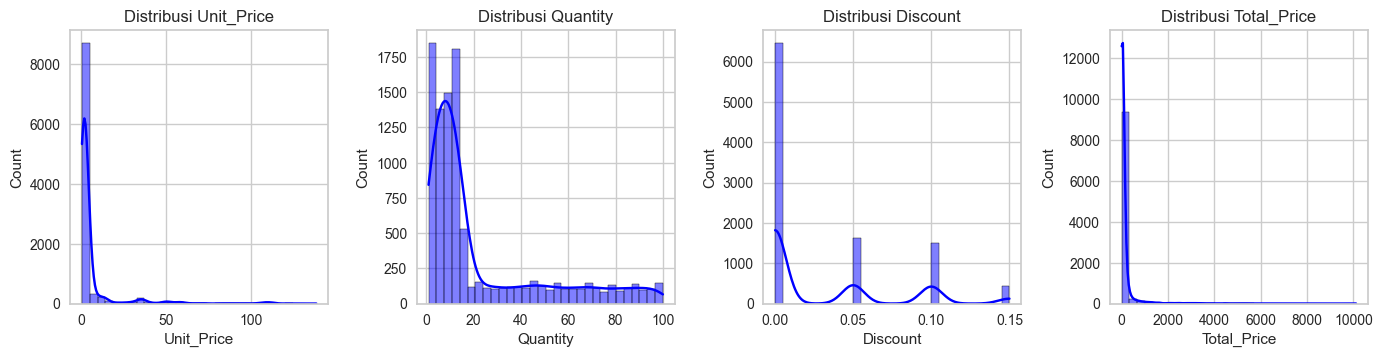

In [7]:
# histogram fitur numerik
numeric_cols = df.select_dtypes(include=[np.number])
plt.figure(figsize=(14, 10))
for i, col in enumerate(numeric_cols.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(df[col], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

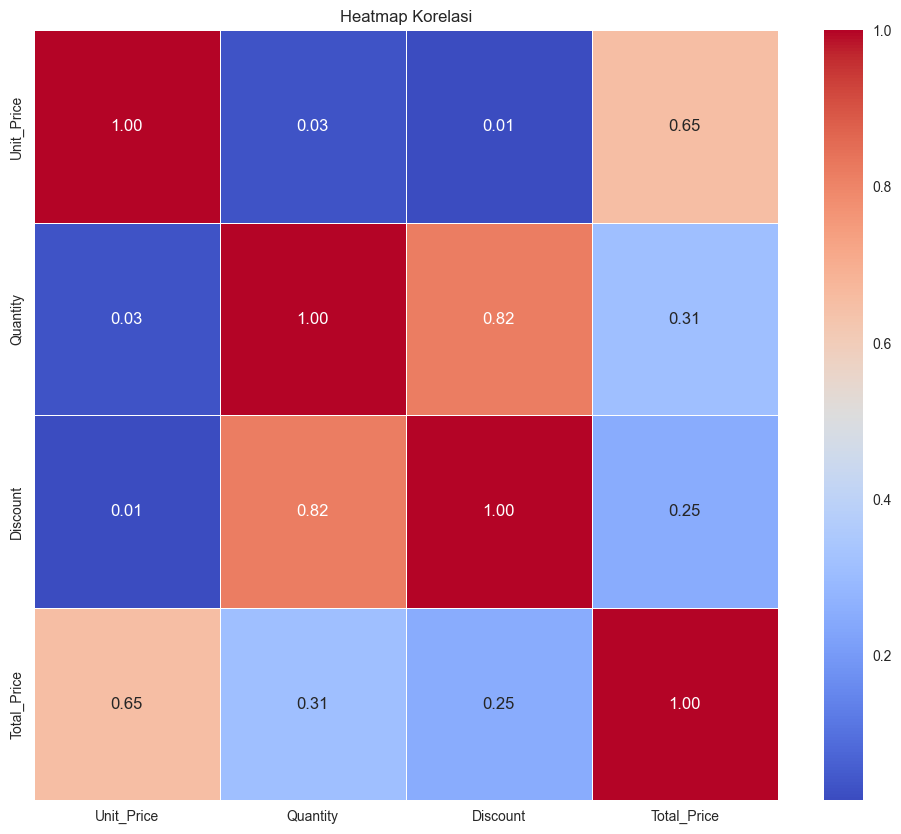

In [8]:
# heatmap korelasi fitur numerik
plt.figure(figsize=(12, 10))
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi')
plt.show()

C:\Users\Asus\AppData\Local\Temp\ipykernel_12716\383092248.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues')
C:\Users\Asus\AppData\Local\Temp\ipykernel_12716\383092248.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues')
C:\Users\Asus\AppData\Local\Temp\ipykernel_12716\383092248.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues')
C:\Users\Asus\Ap

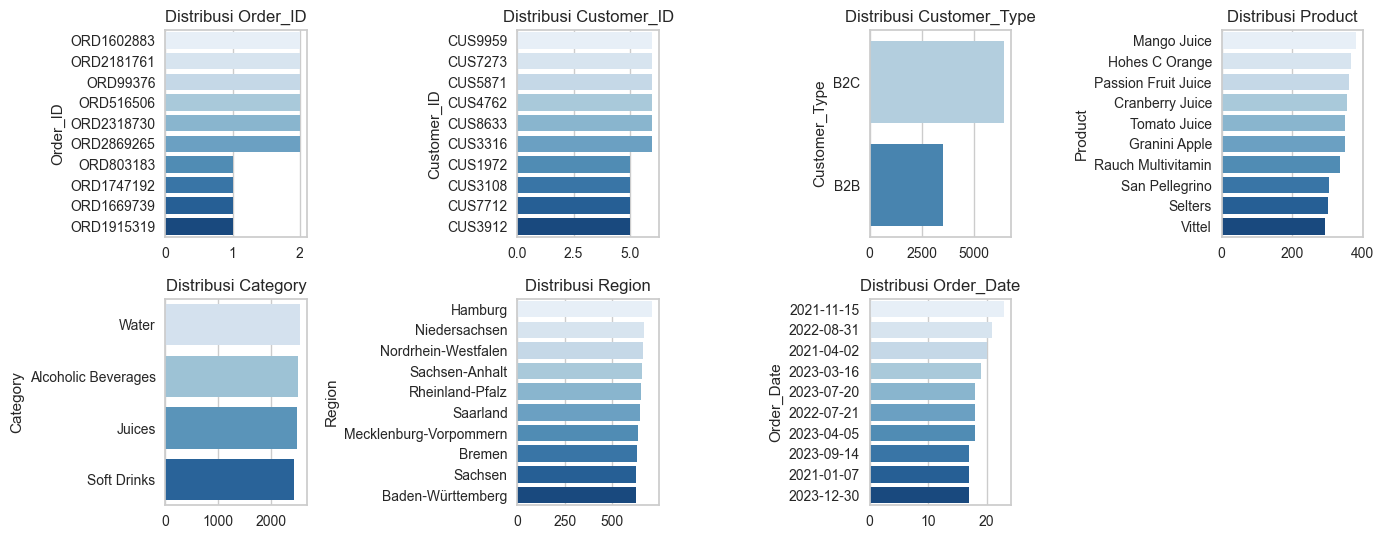

In [9]:
# visualisasi fitur kateforikal
category_cols = df.select_dtypes(include=[object])
plt.figure(figsize=(14, 8))
for i, col in enumerate(category_cols.columns, 1):
    plt.subplot(3, 4, i)
    top_categories = df[col].value_counts().head(10) 
    sns.barplot(y=top_categories.index, x=top_categories.values, palette='Blues')
    plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah.

In [10]:
df_cleaned = df.copy()

In [11]:
features = ['Customer_Type', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price']
df_cleaned = df_cleaned[features]

In [12]:
# missing value
df_cleaned.isnull().sum()

Customer_Type    0
Unit_Price       0
Quantity         0
Discount         0
Total_Price      0
dtype: int64

In [13]:
# duplikasi
df_cleaned.duplicated().sum()

np.int64(4736)

In [14]:
df_cleaned = df_cleaned.drop_duplicates()

In [15]:
df_cleaned.duplicated().sum()

np.int64(0)

In [16]:
df_cleaned.info()
df_cleaned.shape

<class 'pandas.core.frame.DataFrame'>
Index: 5264 entries, 0 to 9996
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Customer_Type  5264 non-null   object 
 1   Unit_Price     5264 non-null   float64
 2   Quantity       5264 non-null   int64  
 3   Discount       5264 non-null   float64
 4   Total_Price    5264 non-null   float64
dtypes: float64(3), int64(1), object(1)
memory usage: 246.8+ KB


(5264, 5)

Unit_Price column: 823 outlier
Quantity column: 0 outlier
Discount column: 0 outlier
Total_Price column: 597 outlier


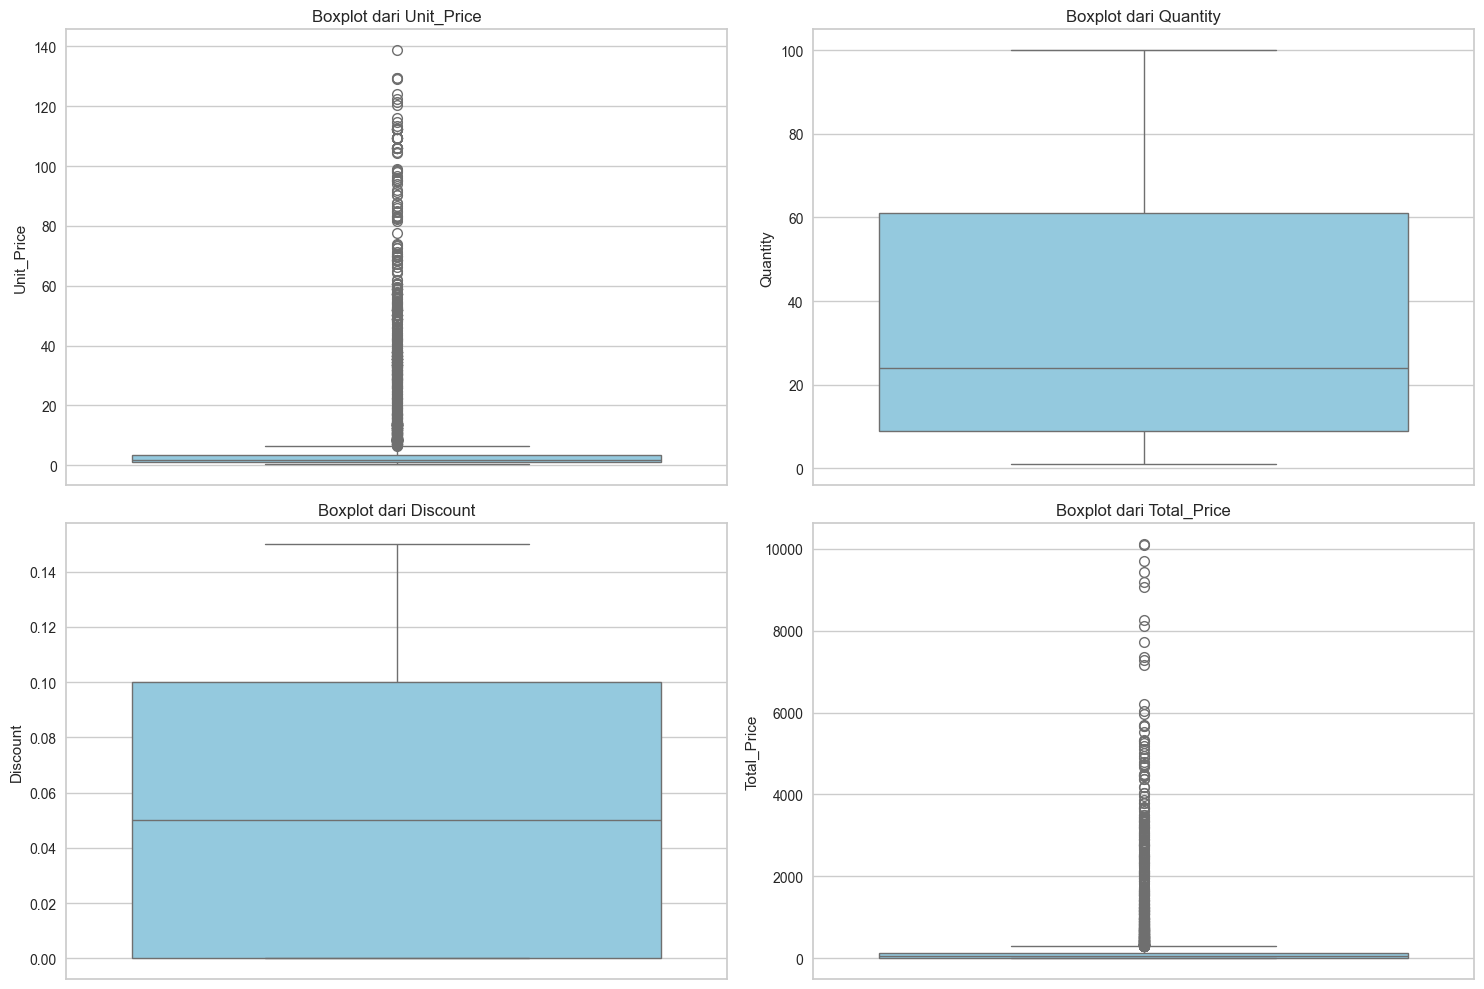

In [17]:
# analisis outlier
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(f'Boxplot dari {col}')

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [18]:
# hapus outlier
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
for col in numeric_cols:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

Unit_Price column: 138 outlier
Quantity column: 0 outlier
Discount column: 0 outlier
Total_Price column: 145 outlier


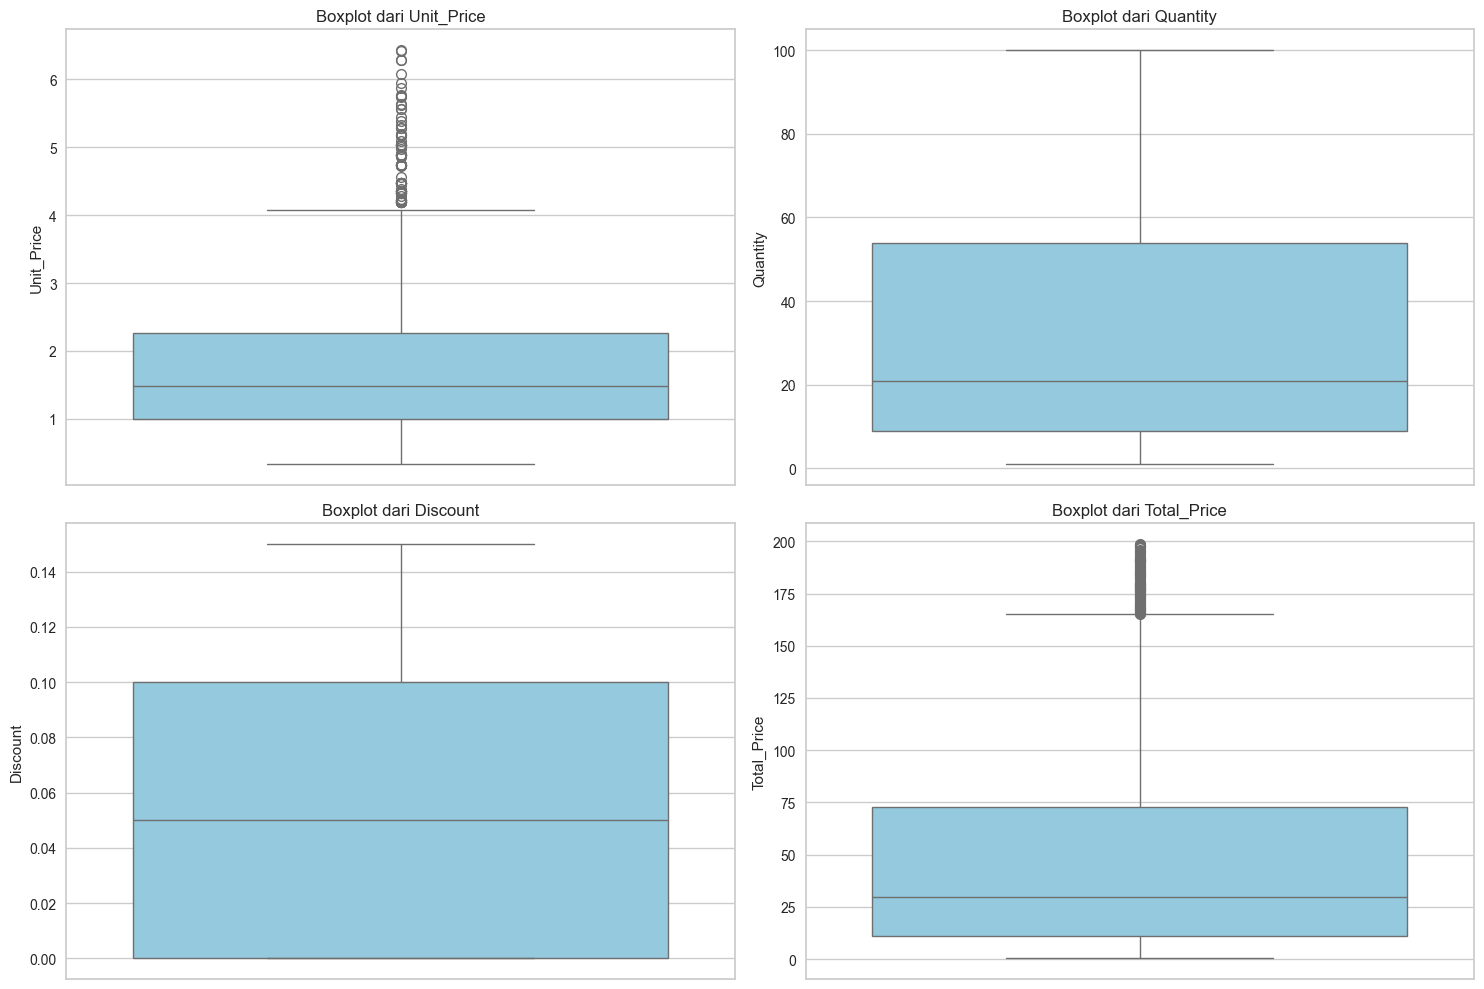

In [19]:
# setelah hapus outlier
numeric_cols = df_cleaned.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 15))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(y=df_cleaned[col], color='skyblue')
    plt.title(f'Boxplot dari {col}')

    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = df_cleaned[(df_cleaned[col] < lower_bound) | (df_cleaned[col] > upper_bound)]
    print(f"{col} column: {len(outliers)} outlier")

plt.tight_layout()
plt.show()

In [20]:
df_cleaned

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
0,B2B,1.87,74,0.10,124.54
1,B2B,1.87,18,0.05,31.98
4,B2C,1.64,4,0.00,6.56
6,B2C,1.74,5,0.00,8.70
7,B2C,1.80,15,0.00,27.00
...,...,...,...,...,...
9986,B2B,2.25,33,0.05,70.54
9987,B2B,3.21,10,0.15,27.28
9988,B2C,1.08,7,0.00,7.56
9990,B2B,1.78,23,0.15,34.80


In [21]:
# encoding fitur kategorikal
category_cols = ['Customer_Type']

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
category_encoded = encoder.fit_transform(df_cleaned[category_cols])
category_df = pd.DataFrame(category_encoded, columns=encoder.get_feature_names_out())

In [22]:
# normalisasi standarisasi
numeric_cols = ['Unit_Price', 'Quantity', 'Discount', 'Total_Price']

scaler = MinMaxScaler()
numeric_scaled = scaler.fit_transform(df_cleaned[numeric_cols])
numeric_df = pd.DataFrame(numeric_scaled, columns=numeric_cols)

In [23]:
# menyatukan kembali fitur numerik dan kategorikal
df_cleaned = pd.concat([numeric_df, category_df], axis=1)
df_cleaned

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C
0,0.252459,0.737374,0.666667,0.626210,1.0,0.0
1,0.252459,0.171717,0.333333,0.159490,1.0,0.0
2,0.214754,0.030303,0.000000,0.031313,0.0,1.0
3,0.231148,0.040404,0.000000,0.042104,0.0,1.0
4,0.240984,0.141414,0.000000,0.134379,0.0,1.0
...,...,...,...,...,...,...
4140,0.314754,0.323232,0.333333,0.353923,1.0,0.0
4141,0.472131,0.090909,1.000000,0.135791,1.0,0.0
4142,0.122951,0.060606,0.000000,0.036355,0.0,1.0
4143,0.237705,0.222222,1.000000,0.173709,1.0,0.0


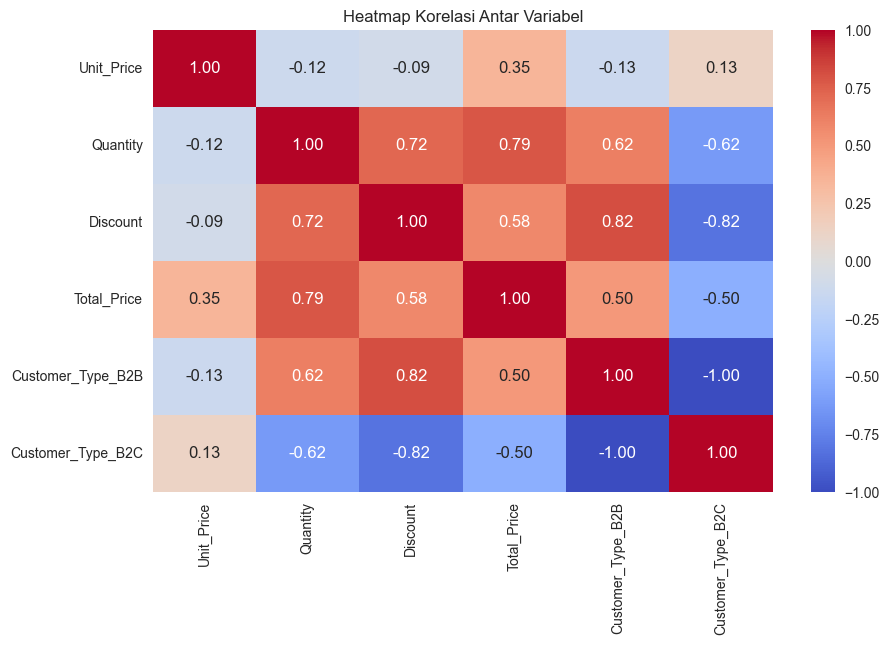

In [24]:
# heatmap korelasi antar variabel
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Heatmap Korelasi Antar Variabel")
plt.show()

# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

In [25]:
# tentukan fitur
features = ['Customer_Type_B2B', 'Customer_Type_B2C', 'Unit_Price', 'Quantity', 'Discount', 'Total_Price']
X = df_cleaned[features]

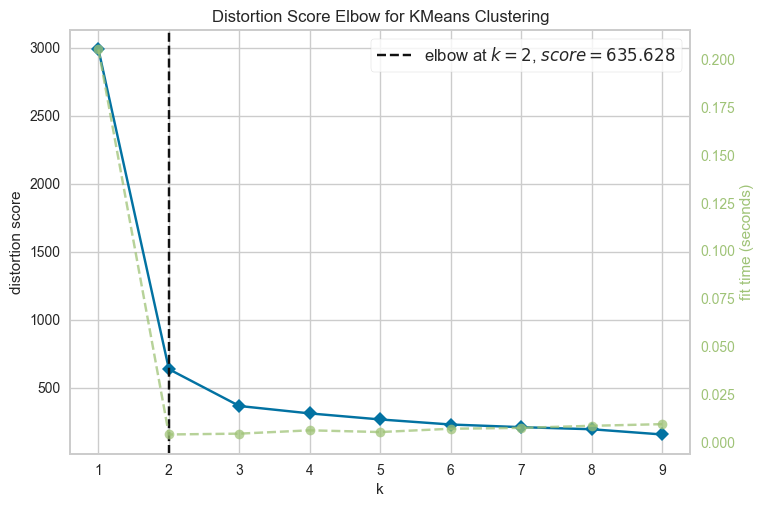

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
# inisialisasi model KMeans tanpa parameter awal
kmeans = KMeans()

# inisialisasi visualizer KElbow untuk menentukan jumlah cluster optimal
visualizer = KElbowVisualizer(kmeans, k=(1, 10))

# Fit visualizer dengan data untuk menemukan jumlah cluster optimal
visualizer.fit(X)

# Menampilkan grafik elbow untuk analisis
visualizer.show()

## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [27]:
# kurangi dimensi data dengan PCA agar mudah untuk visualisasi
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X)

In [28]:
# ambil k optimal dari Elbow method
optimal_k = visualizer.elbow_value_

# Fit data pada model k-means dengan k optimal
kmeans = KMeans(n_clusters=optimal_k, random_state=42, init='k-means++')
labels = kmeans.fit_predict(X_pca)

In [29]:
# hitung Silhouette Score
sil_score = silhouette_score(X_pca, labels)
print(f'Silhouette Score : {sil_score}')

Silhouette Score : 0.8036345272450224


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [30]:
# tidak menggunakan feature selection karena silhoette score >=70

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

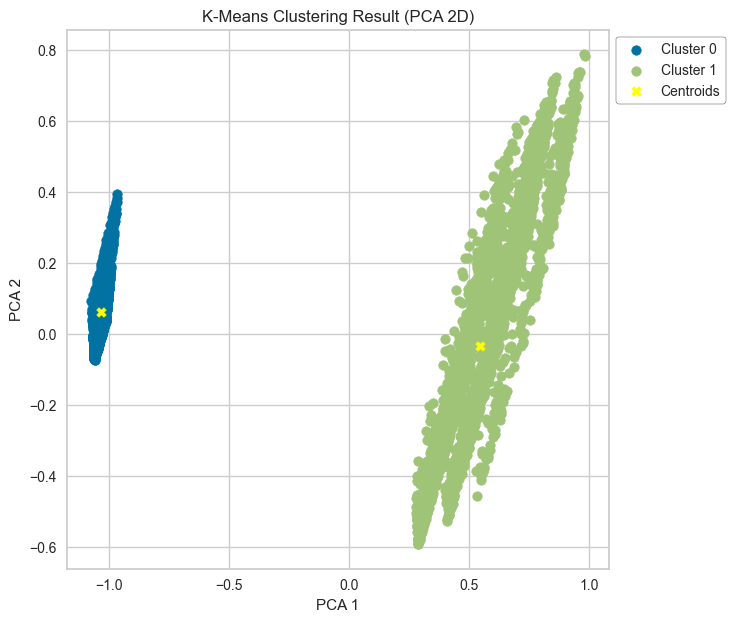

In [31]:
# visualisasi setiap cluster
plt.figure(figsize=(7, 7))
for i in range(2):
    plt.scatter(X_pca[kmeans.labels_ == i, 0], X_pca[kmeans.labels_ == i, 1], label=f'Cluster {i}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='yellow', marker='X', label='Centroids')
plt.title('K-Means Clustering Result (PCA 2D)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1), frameon=True, edgecolor='black')
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

### Interpretasi Target

**Tutorial: Melakukan Inverse Transform pada Data Target Setelah Clustering**

Setelah melakukan clustering dengan model **KMeans**, kita perlu mengembalikan data yang telah diubah (normalisasi, standarisasi, atau label encoding) ke bentuk aslinya. Berikut adalah langkah-langkahnya.

---

**1. Tambahkan Hasil Label Cluster ke DataFrame**
Setelah mendapatkan hasil clustering, kita tambahkan label cluster ke dalam DataFrame yang telah dinormalisasi.

```python
df_normalized['Cluster'] = model_kmeans.labels_
```

Lakukan Inverse Transform pada feature yang sudah dilakukan Labelisasi dan Standararisasi. Berikut code untuk melakukannya:
label_encoder.inverse_transform(X_Selected[['Fitur']])

Lalu masukkan ke dalam kolom dataset asli atau membuat dataframe baru
```python
df_normalized['Fitur'] = label_encoder.inverse_transform(df_normalized[['Fitur']])
```
Masukkan Data yang Sudah Di-Inverse ke dalam Dataset Asli atau Buat DataFrame Baru
```python
df_original['Fitur'] = df_normalized['Fitur']
```

In [32]:
df_normalized = df_cleaned.copy()

In [33]:
df_normalized['Cluster'] = kmeans.labels_
df_normalized.head()

,Unit_Price,Quantity,Discount,Total_Price,Customer_Type_B2B,Customer_Type_B2C,Cluster
0,0.252459,0.737374,0.666667,0.626210,1.0,0.0,1
1,0.252459,0.171717,0.333333,0.159490,1.0,0.0,1
2,0.214754,0.030303,0.000000,0.031313,0.0,1.0,0
3,0.231148,0.040404,0.000000,0.042104,0.0,1.0,0
4,0.240984,0.141414,0.000000,0.134379,0.0,1.0,0


In [34]:
decoded_category = encoder.inverse_transform(category_encoded)
decoded_df = pd.DataFrame(decoded_category, columns=category_cols)

### Inverse Data Jika Melakukan Normalisasi/Standardisasi

Inverse Transform untuk Data yang Distandarisasi
Jika data numerik telah dinormalisasi menggunakan StandardScaler atau MinMaxScaler, kita bisa mengembalikannya ke skala asli:
```python
df_normalized[['Fitur_Numerik']] = scaler.inverse_transform(df_normalized[['Fitur_Numerik']])
```

In [35]:
numerical = scaler.inverse_transform(numeric_scaled)
numerical_df = pd.DataFrame(numerical, columns=numeric_cols)

In [36]:
df_normalized = pd.concat([decoded_df, numerical_df], axis=1)

In [37]:
df_normalized['Cluster'] = kmeans.labels_

In [38]:
df_normalized

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price,Cluster
0,B2B,1.87,74.0,0.10,124.54,1
1,B2B,1.87,18.0,0.05,31.98,1
2,B2C,1.64,4.0,0.00,6.56,0
3,B2C,1.74,5.0,0.00,8.70,0
4,B2C,1.80,15.0,0.00,27.00,0
...,...,...,...,...,...,...
4140,B2B,2.25,33.0,0.05,70.54,1
4141,B2B,3.21,10.0,0.15,27.28,1
4142,B2C,1.08,7.0,0.00,7.56,0
4143,B2B,1.78,23.0,0.15,34.80,1


Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [39]:
cluster_count = df_normalized['Cluster'].value_counts()
print(cluster_count,'\n')

Cluster
1    2704
0    1441
Name: count, dtype: int64 



In [40]:
df_normalized.groupby('Cluster').Customer_Type.value_counts()

Cluster  Customer_Type
0        B2C              1441
1        B2B              2704
Name: count, dtype: int64

Cluster  Customer_Type
0        B2C              1441
1        B2B              2704
Name: count, dtype: int64 



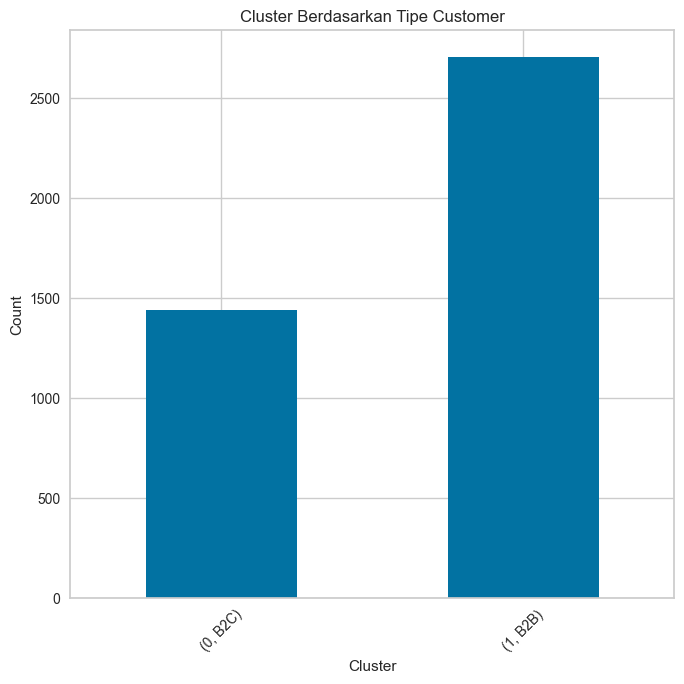

In [41]:
# bar chart berdasarkan 'Cluster' dan 'Customer_Type'
counts = df_normalized.groupby('Cluster').Customer_Type.value_counts()
print(counts,'\n')

# plot dengan bar chart
counts.plot(kind='bar', figsize=(7, 7))
plt.title('Cluster Berdasarkan Tipe Customer')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [42]:
df_normalized.groupby('Cluster').mean(numeric_only=True)

,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,
0,1.885989,8.011103,0.000000,15.196024
1,1.623243,45.529956,0.080843,65.501864


In [43]:
df_normalized.groupby('Cluster').agg(lambda x: x.mode()[0])

,Customer_Type,Unit_Price,Quantity,Discount,Total_Price
Cluster,,,,,
0,B2C,0.46,8.0,0.00,13.44
1,B2B,1.21,3.0,0.05,51.03


Cluster
1    2704
0    1441
Name: count, dtype: int64 



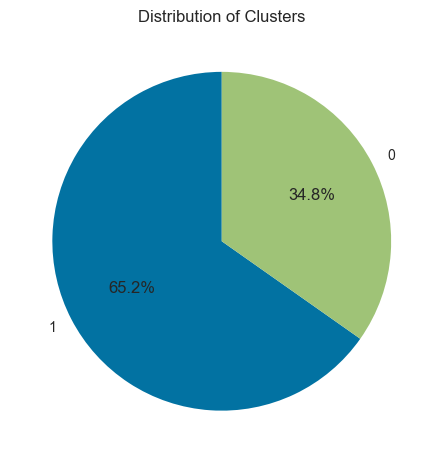

In [44]:
# hitung jumlah data setiap kluster
cluster_count = df_normalized['Cluster'].value_counts()
print(cluster_count,'\n')

# Visualisasi
plt.pie(cluster_count, labels=cluster_count.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Clusters')
plt.show()

Tulis hasil interpretasinya di sini.
	Customer_Type	Unit_Price	Quantity	Discount	Total_Price
Cluster					
0	B2C	0.46	8.0	0.00	13.44
1	B2B	1.21	3.0	0.05	51.03

1. Cluster 0: Tipe pelanggan B2C sebanyak 1441 orang memiliki daya beli yang sedikit, pelanggan B2C bisa disebut juga end-user cenderung membeli barang lebih sedikit dan tidak mendapat diskon biasanya untuk kebutuhan pribadi. Modus pada cluster ini berdasarkan tipe pelanggan pada unit price 0.46, quantity 8 unit, diskon 0%, dan total price 13.44.
2. Cluster 1: Tipe pelanggan B2B sebanyak 2704 memiliki daya beli tinggi, biasanya untuk kebutuhan bisnis yang akan memberikan keuntungan sehingga barang yang dibeli cukup banyak agar mendapat diskon. Modus pada cluster ini berdasarkan tipe pelanggan pada unit price 1.21, quantity 3 unit, diskon 5%, dan total price 51.03.
3. Dilihat dari perbedaan jumlah berdasarkan tipe pelanggan B2B lebih banyak melakukan transasi pembeli ketimbang pelanggan B2C, mungkin karena pelanggan B2B untuk kebutuhan bisnis bisa jadi untuk stok barang, sedangkan pelanggan B2C hanya untuk kebutuhan pribadi.

# Contoh interpretasi [TEMPLATE]
# Analisis Karakteristik Cluster dari Model KMeans

Berikut adalah analisis karakteristik untuk setiap cluster yang dihasilkan dari model KMeans.

## Cluster 0:
- **Rata-rata Unit Price:** 1.88 
- **Rata-rata Quantity:** 8 unit
- **Rata-rata Discount:** 0%
- **Rata-rata Total_Price:** 15
- **Tipe Pelanggan (Customer Type):** B2C (Business-to-Customer)
- **Analisis:**  Berdasarkan pelanggan tipe B2C sebagai end-user dengan kuantitas belanja sedikit dan tidak mendapatkan diskon cenderung untuk kebutuhan pribadi.

## Cluster 1:
- **Rata-rata Unit Price:** 1.62
- **Rata-rata Quantity:** 45 unit
- **Rata-rata Discount:** 8%
- **Rata-rata Total_Price:** 65
- **Tipe Pelanggan (Customer Type):** B2B (Business-to-Business)
- **Analisis:** Berdasarkan pelanggan tipe B2B belanja untuk kebutuhan bisnis dengan kuantitas yang tinggi agar mendapatkan diskon sebagai keuntungan.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [45]:
df_normalized.to_csv('dataset_clustering.csv', index=False)